<a href="https://colab.research.google.com/github/rag09reddy/my_codes/blob/main/Extracting_data_vtk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a VTK file and Extracting the data from the VTK file and storing it into a data set.

In [61]:
!pip install vtk
!pip install pyvista


In [73]:
from numpy.lib import shape_base
import pyvista as pv
import numpy as np
import vtk
import pandas as pd
from vtk.util.numpy_support import vtk_to_numpy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D





# Defining the path of the file

In [63]:
# Use the copied file path here
file_path = "/content/fluid.vtk_gap.vtk"

# Specify the path to your VTK file
vtk_file_path = 'fluid.vtk_gap.vtk'

# Reading the file, priting the type of the data and points in the vtk file

In [64]:
# Read the VTK file
mesh = pv.read(vtk_file_path)
print("Mesh details")
print(mesh)

coordinates_points = np.array(mesh.points)
coordinates_cells = np.array(mesh.cells)

# Print the size of each point data array
print("Point Data Array Sizes:")
for array_name in mesh.array_names:
    array_size = mesh[array_name].size
    print(f"{array_name}: {array_size}")

Mesh details
UnstructuredGrid (0x7aedd3c8b280)
  N Cells:    157360
  N Points:   385560
  X Bounds:   -6.380e-02, 6.380e-02
  Y Bounds:   -6.380e-02, 6.380e-02
  Z Bounds:   -1.691e-02, 1.000e-02
  N Arrays:   24
Point Data Array Sizes:
p[bar]: 157360
rho2D[kg/m3]: 157360
h[microns]: 157360
contact[microns]: 157360
dhdt[mm/s]: 157360
top_bottom: 157360
fw[kg/s]: 157360
fe[kg/s]: 157360
fs[kg/s]: 157360
fn[kg/s]: 157360
mu[Pas]: 157360
rho[kg/m^3]: 157360
T[C]: 157360
phid[W]: 157360
phid_avg[W]: 157360
mdotn[bar]: 157360
mdots[bar]: 157360
mdotwbar]: 157360
mdote[bar]: 157360
dp_n[bar]: 157360
dp_s[bar]: 157360
dp_w[bar]: 157360
dp_e[bar]: 157360
V[m/s]: 472080


# The data array are in the cell format i.e 157360, we need to convert it into point data.

In [ ]:

# Read the VTK file
mesh = pv.read(vtk_file_path)
print("Mesh details")
print(mesh)

coordinates_points = np.array(mesh.points)

# Convert cell data to point data
cell_to_point = mesh.cell_data_to_point_data()

# Verify the conversion
print("Converted Point Data Arrays:")
for array_name in cell_to_point.array_names:
    array_size = cell_to_point[array_name].size
    print(f"{array_name}: {array_size}")


# After converting to the point data appending all the data arrays and making a data set, together

In [69]:

# Read the VTK file
mesh = pv.read(vtk_file_path)
print("Mesh details")
print(mesh)

coordinates_points = np.array(mesh.points)

# Convert cell data to point data
cell_to_point = mesh.cell_data_to_point_data()

# Create a Pandas DataFrame to store points and point data arrays
data_arrays = [cell_to_point[array_name] for array_name in cell_to_point.array_names]
filtered_arrays = [array_name for array_name, data_array in zip(cell_to_point.array_names, data_arrays) if len(data_array) == len(coordinates_points)]
combined_data = np.column_stack([coordinates_points] + [cell_to_point[array_name] for array_name in filtered_arrays])
column_names = ['X', 'Y', 'Z'] + filtered_arrays

# Ensure the correct number of columns
combined_data = combined_data[:, :len(column_names)]

# Create a DataFrame
df = pd.DataFrame(combined_data, columns=column_names)

# Save the DataFrame to a CSV file
df.to_csv('combined_data_filtered.csv', index=False)

# Verify the saved CSV file
saved_df = pd.read_csv('combined_data_filtered.csv')
#print("Saved DataFrame details")
#print(saved_df)


Mesh details
UnstructuredGrid (0x7aedde85e320)
  N Cells:    157360
  N Points:   385560
  X Bounds:   -6.380e-02, 6.380e-02
  Y Bounds:   -6.380e-02, 6.380e-02
  Z Bounds:   -1.691e-02, 1.000e-02
  N Arrays:   24


In [ ]:
df.head()

In [79]:
print(df.size)


2698920


# Minimising the Data set to require Point arrays.
1. T [c]
2. h [micron]
3. contact [micron]
4. p [bar]

In [80]:
# Specify the columns you want to keep
selected_columns = ['X', 'Y', 'Z', 'T[C]', 'h[microns]', 'contact[microns]', 'p[bar]']

# Create a new DataFrame with only the selected columns
df = df[selected_columns]

df.head()


,X,Y,Z,T[C],h[microns],contact[microns],p[bar]
0,-0.000386,0.044198,-0.014071,60.791168,13.253304,0.0,0.9
1,0.000386,0.044198,-0.014156,60.798195,13.315508,0.0,0.9
2,0.001157,0.044185,-0.014236,60.795219,13.373804,0.0,0.9
3,0.001928,0.044158,-0.014318,60.780487,13.432192,0.0,0.9
4,0.002698,0.044118,-0.014400,60.747025,13.492344,0.0,0.9


# PLoting the critical locations in the fluid film using these point array.

# Temperature
Plotting Higest (500) temperature points

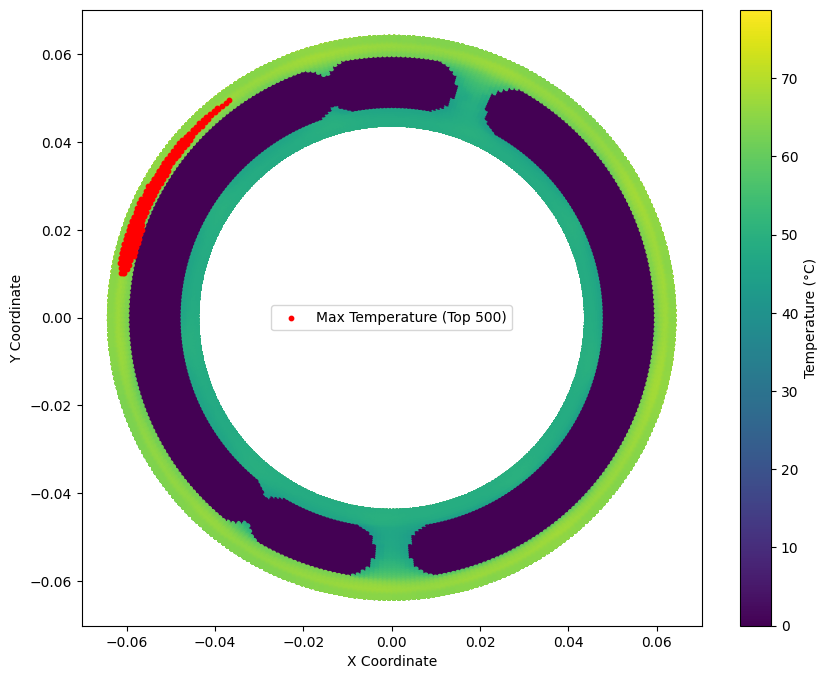

In [107]:
# Check the number of columns in your DataFrame
num_columns = df.shape[1]

# Assuming the last three columns represent spatial coordinates
if num_columns >= 3:
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]

    n = 500

    # Assuming 'T[C]' is the column containing temperature values
    temperatures = df['T[C]']

    # Find the indices of the highest 500 temperature values
    max_temp_indices = temperatures.nlargest(n).index


    # Create a 2D scatter plot with adjusted color scale
    plt.figure(figsize=(10, 8))


    scatter = plt.scatter(x, y, c=temperatures, s=10, cmap='viridis', label='Temperature')
    scatter.set_clim(temperatures.min(), temperatures.max())  # Set color scale limits


    # Plot the maximum temperature points in red without affecting the color scale
    max_temp_scatter = plt.scatter(x[max_temp_indices], y[max_temp_indices], c='red', s=10, label='Max Temperature (Top 500)')
    max_temp_scatter.set_clim(temperatures.min(), temperatures.max())  # Set color scale limits


    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

    # Create a colorbar for the first scatter plot
    cbar = plt.colorbar(label='Temperature (°C)')

    # Create a legend for both scatter plots
    plt.legend(handles=[max_temp_scatter], loc='center')

    plt.show()




# Pressure
Plotting Higest (500) Pressure points

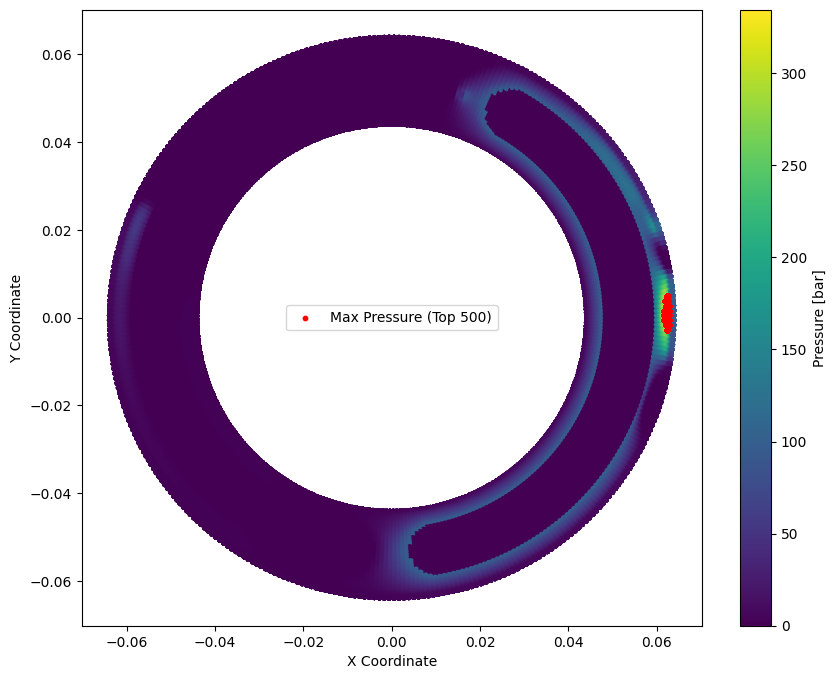

In [109]:
# Check the number of columns in your DataFrame
num_columns = df.shape[1]

# Assuming the last three columns represent spatial coordinates
if num_columns >= 3:
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]

    n = 500

    # Assuming 'p[bar]' is the column containing pressure values
    p_s = df['p[bar]']

    # Find the indices of the highest 500 pressure values
    max_p_indices = p_s.nlargest(n).index


    # Create a 2D scatter plot with adjusted color scale
    plt.figure(figsize=(10, 8))


    scatter = plt.scatter(x, y, c=p_s, s=10, cmap='viridis', label='Pressure [bar]')
    scatter.set_clim(p_s.min(), p_s.max())  # Set color scale limits


    # Plot the maximum pressure points in red without affecting the color scale
    max_p_scatter = plt.scatter(x[max_p_indices], y[max_p_indices], c='red', s=10, label='Max Pressure (Top 500)')
    max_p_scatter.set_clim(p_s.min(), p_s.max())  # Set color scale limits


    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

    # Create a colorbar for the first scatter plot
    cbar = plt.colorbar(label='Pressure [bar]')

    # Create a legend for both scatter plots
    plt.legend(handles=[max_p_scatter], loc='center')

    plt.show()




# Gap Height
Plotting Lowest (500) Gap height points

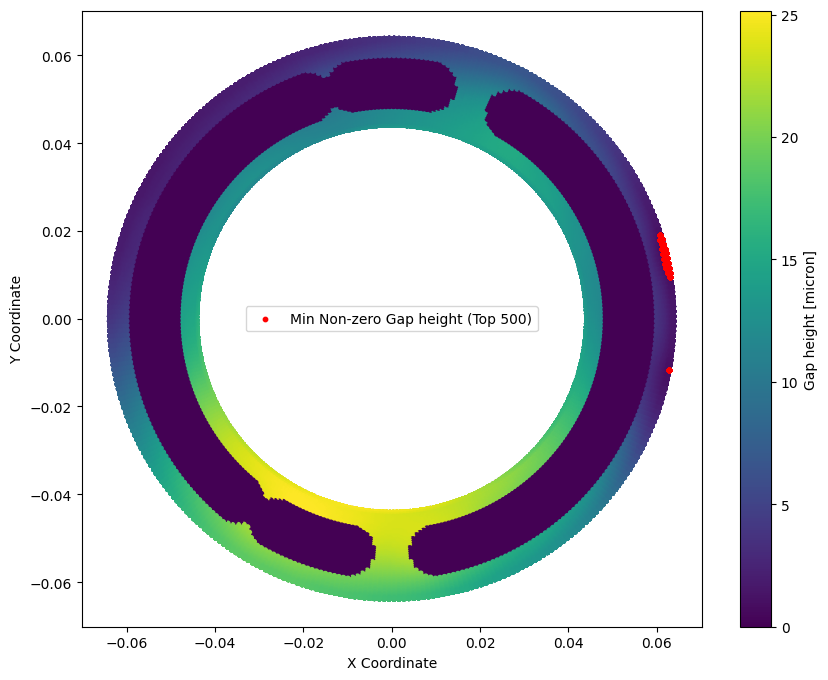

In [112]:
# Check the number of columns in your DataFrame
num_columns = df.shape[1]

# Assuming the last three columns represent spatial coordinates
if num_columns >= 3:
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]

    n = 500

    # Assuming 'h[microns]' is the column containing pressure values
    h_gap = df['h[microns]']

    # Filter out zero values from the 'h_gap' column
    non_zero_h_gap = h_gap[h_gap != 0]

    # Find the indices of the smallest 500 non-zero gap height values
    min_non_zero_h_gap_indices = non_zero_h_gap.nsmallest(n).index

    # Create a 2D scatter plot with adjusted color scale
    plt.figure(figsize=(10, 8))

    scatter = plt.scatter(x, y, c=h_gap, s=10, cmap='viridis')
    scatter.set_clim(h_gap.min(), h_gap.max())  # Set color scale limits

    # Plot the smallest non-zero gap height points in red without affecting the color scale
    min_non_zero_h_gap_scatter = plt.scatter(x[min_non_zero_h_gap_indices], y[min_non_zero_h_gap_indices], c='red', s=10, label='Min Non-zero Gap height (Top 500)')
    min_non_zero_h_gap_scatter.set_clim(h_gap.min(), h_gap.max())  # Set color scale limits

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')

    # Create a colorbar for the first scatter plot
    cbar = plt.colorbar(label='Gap height [micron]')

    # Create a legend for both scatter plots
    plt.legend(handles=[min_non_zero_h_gap_scatter], loc='center')

    plt.show()


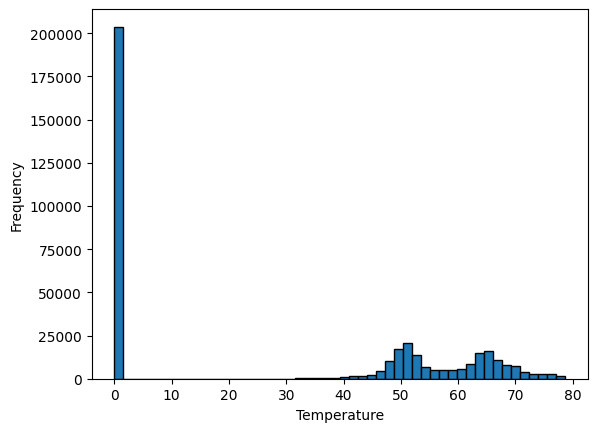

In [85]:
plt.hist(temperatures, bins=50, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

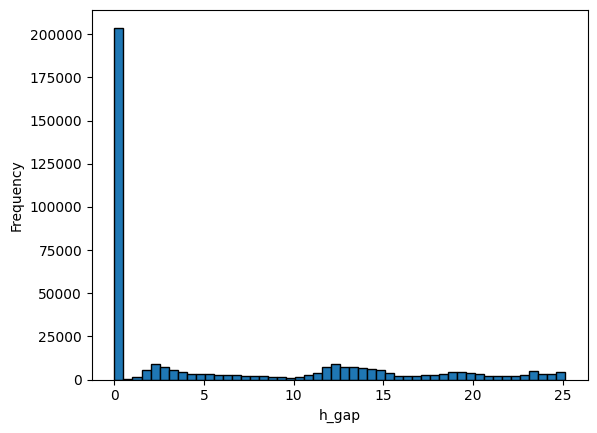

In [113]:
plt.hist(h_gap, bins=50, edgecolor='black')
plt.xlabel('h_gap')
plt.ylabel('Frequency')
plt.show()

# This is about the old Multics file.

In [ ]:


# Specify the path to your VTK file
file_name = 'fluid.vtk_gap.vtk'

# Read the VTK file
mesh = pv.read(file_name)

coordinates = np.array(mesh.points)
# List available point data arrays
print("Point Data Arrays:")
print(mesh.array_names)

# Access a specific point data array, e.g., "pFilm[bar]"
if 'pFilm[bar]' in mesh.array_names:
    pFilm_array = mesh['pFilm[bar]']

    # Convert to a NumPy array and print all values
    pFilm_values = np.array(pFilm_array)
    pFilm_values = np.nan_to_num(pFilm_values, nan=0.97)


    print("pFilm[bar] Data Array:")
    print(pFilm_values)
    print(pFilm_values.shape)
    x =np.column_stack((coordinates, pFilm_values))
    np.savetxt('x.txt', x, delimiter='\t', fmt='%.6f')
    print(np.sum(pFilm_values))

else:
    print("The 'pFilm[bar]' data array is not present in the dataset.")

Point Data Arrays:
['pFilm[bar]', 'pContact[bar]', 'aFractContact[-]', 'TFilm[degC]', 'rho[kg/m^3]', 'fV[-]', 'fG[-]', 'alphaV[-]', 'alphaG[-]', 'convCFL[-]', 'diffCFL[-]', 'hRigid[micron]', 'dhdt[m/s]', 'dhRigiddt[m/s]', 'pAll[bar]', 'boundaryID[-]', 'Utheta[m/s]', 'Uaxial[m/s]', 'PecletTheta[-]', 'PecletZ[-]', 'UbarSurface[m/s]', 'gradp[Pa/m]', 'meanFlowVel[m/s]', 'shearStressCouetteOuter[bar]', 'shearStressCouetteInner[bar]', 'shearStressPoiseuille[bar]', 'filmDir']
pFilm[bar] Data Array:
[0.97561216 0.97561216 0.97561216 ... 0.97561216 0.97561216 0.97561216]
(29600,)
[[ 58.95       -13.855758   -15.5          0.97561216]
 [ 58.94668    -13.230104   -15.5          0.97561216]
 [ 58.936718   -12.604522   -15.5          0.97561216]
 ...
 [ 58.92012    -15.732436    15.5          0.97561216]
 [ 58.936718   -15.106994    15.5          0.97561216]
 [ 58.94668    -14.481411    15.5          0.97561216]]
1153590.0
